In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('Trip Data for ML Model.csv')

In [3]:
df.head()

,Operated_date,Operated_Day,Route_Name,Sch_Trip_Start,Sch_Trip_End,Actual_Trip_Start,Actual_Trip_End,Sch_Km,Actual_Km,Trip_Start_Time_Diff,Trip_End_Time_Diff,Sch_Trip_Hrs,Actual_Trip_Hrs,Is_Rd,Is_Breakdown,Is_LateAllocated,LU_Count
0,30-04-2024,Tuesday,801AUp,30-04-2024 13:18,30-04-2024 14:22,30-04-2024 13:19,30-04-2024 13:49,13.4,13.29,1,-33,64,30,Yes#,No,No,180.0
1,30-04-2024,Tuesday,801Down,30-04-2024 14:28,30-04-2024 16:55,30-04-2024 15:09,30-04-2024 16:28,38.4,19.05,41,-27,147,79,No,No,No,478.0
2,30-04-2024,Tuesday,801LnkSTLDown,30-04-2024 19:47,30-04-2024 20:42,30-04-2024 19:30,30-04-2024 20:31,15.8,14.29,-17,-11,55,61,Yes#,No,No,362.0
3,30-04-2024,Tuesday,772ASTLUp,30-04-2024 12:48,30-04-2024 13:01,30-04-2024 12:47,30-04-2024 12:53,4.0,4.00,-1,-8,13,6,No,No,Yes,37.0
4,30-04-2024,Tuesday,801ADown,30-04-2024 11:47,30-04-2024 12:46,30-04-2024 11:54,30-04-2024 12:37,17.6,16.56,7,-9,59,43,Yes#,No,Yes,255.0


In [4]:
df.shape


(806691, 17)

In [5]:
print(df['Route_Name'].unique())

['801AUp' '801Down' '801LnkSTLDown' ... '457LSTLUp' 'CBD2(-)Down'
 '745ADown']


In [6]:
print(df['Operated_Day'].unique())

['Tuesday' 'Monday' 'Sunday' 'Saturday' 'Friday' 'Thursday' 'Wednesday']


In [7]:
df.isnull().sum

<bound method DataFrame.sum of         Operated_date  Operated_Day  Route_Name  Sch_Trip_Start  Sch_Trip_End  \
0               False         False       False           False         False   
1               False         False       False           False         False   
2               False         False       False           False         False   
3               False         False       False           False         False   
4               False         False       False           False         False   
...               ...           ...         ...             ...           ...   
806686          False         False       False           False         False   
806687          False         False       False           False         False   
806688          False         False       False           False         False   
806689          False         False       False           False         False   
806690          False         False       False           False         False 

In [8]:
df.describe

<bound method NDFrame.describe of        Operated_date Operated_Day     Route_Name    Sch_Trip_Start  \
0         30-04-2024      Tuesday         801AUp  30-04-2024 13:18   
1         30-04-2024      Tuesday        801Down  30-04-2024 14:28   
2         30-04-2024      Tuesday  801LnkSTLDown  30-04-2024 19:47   
3         30-04-2024      Tuesday      772ASTLUp  30-04-2024 12:48   
4         30-04-2024      Tuesday       801ADown  30-04-2024 11:47   
...              ...          ...            ...               ...   
806686    01-04-2024       Monday          109Up  01-04-2024 08:19   
806687    01-04-2024       Monday       109ADown  01-04-2024 19:01   
806688    01-04-2024       Monday         109AUp  01-04-2024 20:17   
806689    01-04-2024       Monday        109Down  01-04-2024 14:37   
806690    01-04-2024       Monday     109STLDown  01-04-2024 21:13   

            Sch_Trip_End Actual_Trip_Start   Actual_Trip_End  Sch_Km  \
0       30-04-2024 14:22  30-04-2024 13:19  30-04-202

In [9]:
df.columns

Index(['Operated_date', 'Operated_Day', 'Route_Name', 'Sch_Trip_Start',
       'Sch_Trip_End', 'Actual_Trip_Start', 'Actual_Trip_End', 'Sch_Km',
       'Actual_Km', 'Trip_Start_Time_Diff', 'Trip_End_Time_Diff',
       'Sch_Trip_Hrs', 'Actual_Trip_Hrs', 'Is_Rd', 'Is_Breakdown',
       'Is_LateAllocated', 'LU_Count'],
      dtype='object')

In [10]:
final_dataset=df[['Operated_Day', 'Route_Name', 'Sch_Trip_Start',
       'Sch_Trip_End', 'Actual_Trip_Start', 'Actual_Trip_End', ]]

In [11]:
final_dataset.head()

,Operated_Day,Route_Name,Sch_Trip_Start,Sch_Trip_End,Actual_Trip_Start,Actual_Trip_End
0,Tuesday,801AUp,30-04-2024 13:18,30-04-2024 14:22,30-04-2024 13:19,30-04-2024 13:49
1,Tuesday,801Down,30-04-2024 14:28,30-04-2024 16:55,30-04-2024 15:09,30-04-2024 16:28
2,Tuesday,801LnkSTLDown,30-04-2024 19:47,30-04-2024 20:42,30-04-2024 19:30,30-04-2024 20:31
3,Tuesday,772ASTLUp,30-04-2024 12:48,30-04-2024 13:01,30-04-2024 12:47,30-04-2024 12:53
4,Tuesday,801ADown,30-04-2024 11:47,30-04-2024 12:46,30-04-2024 11:54,30-04-2024 12:37


In [12]:
print(final_dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 806691 entries, 0 to 806690
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Operated_Day       806691 non-null  object
 1   Route_Name         806691 non-null  object
 2   Sch_Trip_Start     806691 non-null  object
 3   Sch_Trip_End       806691 non-null  object
 4   Actual_Trip_Start  806691 non-null  object
 5   Actual_Trip_End    806691 non-null  object
dtypes: object(6)
memory usage: 36.9+ MB
None


In [13]:
df['Sch_Trip_Start'] = pd.to_datetime(df['Sch_Trip_Start'], format='%d-%m-%Y %H:%M')
df['Actual_Trip_Start'] = pd.to_datetime(df['Actual_Trip_Start'], format='%d-%m-%Y %H:%M')

In [14]:
df['start_hour'] = df['Sch_Trip_Start'].dt.hour
df['start_minute'] = df['Sch_Trip_Start'].dt.minute
df['start_day'] = df['Sch_Trip_Start'].dt.dayofweek 

In [15]:
df[['Sch_Trip_Start', 'start_hour', 'start_minute', 'start_day']].head()

,Sch_Trip_Start,start_hour,start_minute,start_day
0,2024-04-30 13:18:00,13,18,1
1,2024-04-30 14:28:00,14,28,1
2,2024-04-30 19:47:00,19,47,1
3,2024-04-30 12:48:00,12,48,1
4,2024-04-30 11:47:00,11,47,1


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns


In [17]:
plt.figure(figsize=(16, 12))


<Figure size 1600x1200 with 0 Axes>

<Figure size 1600x1200 with 0 Axes>

Text(0, 0.5, 'Frequency')

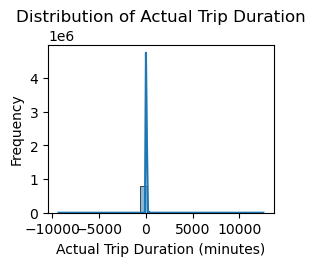

In [18]:
plt.subplot(2, 2, 1)
sns.histplot(df['Actual_Trip_Hrs'], kde=True, bins=30)
plt.title('Distribution of Actual Trip Duration')
plt.xlabel('Actual Trip Duration (minutes)')
plt.ylabel('Frequency')

Text(0, 0.5, 'Actual Trip Duration (minutes)')

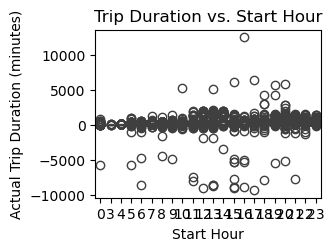

In [19]:
plt.subplot(2, 2, 2)
sns.boxplot(x='start_hour', y='Actual_Trip_Hrs', data=df)
plt.title('Trip Duration vs. Start Hour')
plt.xlabel('Start Hour')
plt.ylabel('Actual Trip Duration (minutes)')

([<matplotlib.axis.XTick at 0x14b32676de0>,
 [Text(0, 0, 'Mon'),
  Text(1, 0, 'Tue'),
  Text(2, 0, 'Wed'),
  Text(3, 0, 'Thu'),
  Text(4, 0, 'Fri'),
  Text(5, 0, 'Sat'),
  Text(6, 0, 'Sun')])

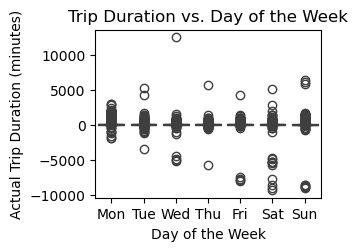

In [20]:
plt.subplot(2, 2, 3)
sns.boxplot(x='start_day', y='Actual_Trip_Hrs', data=df)
plt.title('Trip Duration vs. Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Actual Trip Duration (minutes)')
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6], labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  15

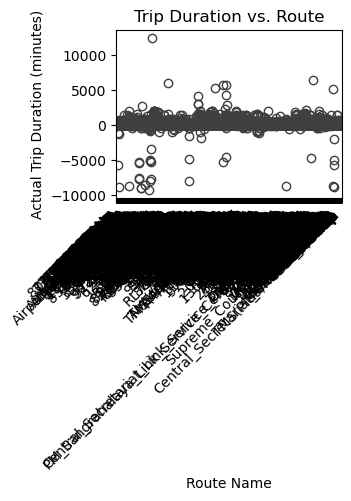

In [21]:
plt.subplot(2, 2, 4)
sns.boxplot(x='Route_Name', y='Actual_Trip_Hrs', data=df)
plt.title('Trip Duration vs. Route')
plt.xlabel('Route Name')
plt.ylabel('Actual Trip Duration (minutes)')
plt.xticks(rotation=45, ha='right')

In [22]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

In [24]:
features = df[['start_hour', 'start_minute', 'start_day', 'Route_Name']].copy()
target = df['Actual_Trip_Hrs']

In [25]:
route_mean_duration = df.groupby('Route_Name')['Actual_Trip_Hrs'].mean()
features.loc[:,'Route_Name_Encoded'] = features['Route_Name'].map(route_mean_duration)

In [26]:
features_cleaned = features.drop(columns=['Route_Name'])

In [27]:
X_train, X_test, y_train, y_test = train_test_split(features_cleaned, target, test_size=0.2, random_state=42)

In [28]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [29]:
y_pred = model.predict(X_test)

In [30]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [31]:
print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {rmse}')

Mean Absolute Error: 14.925955236469267
Root Mean Squared Error: 61.598806765440585



**Changeof approch new model random forest**


In [75]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import Ridge, Lasso
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [67]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('poly_features', PolynomialFeatures(degree=2, include_bias=False)),
    ('ridge', Ridge(alpha=1.0, random_state=42))  # You can adjust alpha for regularization strength
])

In [69]:
ridge_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
print(f"Mean Absolute Error (Ridge, with poly features): {-ridge_scores.mean():.2f}")


Mean Absolute Error (Ridge, with poly features): 14.41


In [71]:
pipeline_lasso = Pipeline([
    ('scaler', StandardScaler()),
    ('poly_features', PolynomialFeatures(degree=2, include_bias=False)),
    ('lasso', Lasso(alpha=0.1, random_state=42))
])


In [73]:
lasso_scores = cross_val_score(pipeline_lasso, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
print(f"Mean Absolute Error (Lasso, with poly features): {-lasso_scores.mean():.2f}")

Mean Absolute Error (Lasso, with poly features): 14.42


In [77]:
param_grid = {
    'alpha': [0.1, 1.0, 10.0, 100.0],
    'max_iter': [1000, 5000, 10000]
}

In [81]:
lasso = Lasso()

In [83]:
grid_search_lasso = GridSearchCV(estimator=lasso, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error')

# Fit the model
grid_search_lasso.fit(X_train, y_train)

# Best parameters and score
print("Best parameters for Lasso: ", grid_search_lasso.best_params_)
print("Best MAE for Lasso: ", -grid_search_lasso.best_score_)

Best parameters for Lasso:  {'alpha': 1.0, 'max_iter': 1000}
Best MAE for Lasso:  14.908290235163753


In [85]:
ridge = Ridge()

In [87]:
grid_search_ridge = GridSearchCV(estimator=ridge, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error')

# Fit the model
grid_search_ridge.fit(X_train, y_train)

# Best parameters and score
print("Best parameters for Ridge: ", grid_search_ridge.best_params_)
print("Best MAE for Ridge: ", -grid_search_ridge.best_score_)

Best parameters for Ridge:  {'alpha': 100.0, 'max_iter': 1000}
Best MAE for Ridge:  14.937862985887836


In [89]:
# Lasso
best_lasso = grid_search_lasso.best_estimator_
y_pred_lasso = best_lasso.predict(X_test)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)

# Ridge
best_ridge = grid_search_ridge.best_estimator_
y_pred_ridge = best_ridge.predict(X_test)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)


In [91]:
print("Test MAE for Lasso: ", mae_lasso)
print("Test MAE for Ridge: ", mae_ridge)

Test MAE for Lasso:  14.893282544636804
Test MAE for Ridge:  14.925950177389609


In [94]:
import pickle


In [100]:
with open('Bus_Arrival_phase1.pkl', 'wb') as file:
    pickle.dump(Ridge, file)